In [1]:
# import sys
# sys.path[0] = "/pubhome/qcxia02/work/espalomac"
import os
import torch
import espaloma as esp
from espaloma.graphs.graph import Graph
from openff.toolkit.topology import Molecule
from rdkit import Chem
from pathlib import Path
import utils


In [2]:
UNICON_EXE = "/pubhome/soft/ZBH2021/unicon/unicon"
CGENFF_EXE = "/pubhome/qcxia02/soft/cgenff/cgenff"
CHARMM = "/pubhome/qcxia02/soft/charmm/bin/charmm"
utilspath = "/pubhome/qcxia02/work/espalomac/examples/scripts/utils"

In [3]:

def sdf2xyz(sdffile):
    xyzs = []
    lines = Path(sdffile).read_text().split("\n")
    for i, line in enumerate(lines):
        linesplit = line.split()
        if len(linesplit) == 16: # atom xyz lines
            xyzs.append([float(linesplit[0]), float(linesplit[1]), float(linesplit[2])])
    
    return xyzs

def reorgxyz(xyzs, atommaplist):
    newxyzs = []
    for i in atommaplist:
        newxyzs.append(xyzs[i])
    return newxyzs


In [4]:
sdffile = "/pubhome/qcxia02/dataset/TorsionNet500/TorsionNet500_mm_opt_geometries/fragment_1_1.sdf"
rdmol = Chem.SDMolSupplier(sdffile, removeHs = False)[0]
# mol = Molecule.from_rdkit(rdmol,allow_undefined_stereo=True,hydrogens_are_explicit= True)
smi = Chem.MolToSmiles(rdmol)
atommaplist = list(map(int, rdmol.GetProp("_smilesAtomOutputOrder")[1:-2].split(",")))
print(atommaplist)
print(smi)
mol = Molecule.from_smiles(smi,allow_undefined_stereo=True,hydrogens_are_explicit=True)


[17, 13, 7, 2, 1, 6, 0, 5, 10, 15, 11, 14, 12, 16, 4, 3, 9, 8]
[H]c1nc(N([H])c2nc([H])c([H])c([H])n2)n([H])n1


In [5]:
for j in range(1,500):
    testlist = []
    for i in range(1,25):
        sdffile = f"/pubhome/qcxia02/dataset/TorsionNet500/TorsionNet500_mm_opt_geometries/fragment_1_{i}.sdf"
        rdmol = Chem.SDMolSupplier(sdffile, removeHs = False)[0]
        smi = Chem.MolToSmiles(rdmol)
        atommaplist = list(map(int, rdmol.GetProp("_smilesAtomOutputOrder")[1:-2].split(",")))
        if i == 1:
            testlist.append(atommaplist)
        elif atommaplist != testlist[0]:
            testlist.append(atommaplist)
    if len(testlist) != 1:
        print(j)
        print(testlist)



In [16]:
xyzs = sdf2xyz(sdffile)
newxyzs = reorgxyz(xyzs, atommaplist)
print(torch.tensor([newxyzs]))
print(torch.tensor([newxyzs]*24).shape)
# print(torch.tensor([newxyzs]*24).transpose(0,1).shape)
print(heterograph.nodes["n1"])
heterograph.nodes["n1"].data["xyz"] = torch.tensor([newxyzs]*24).transpose(0,1)
print(heterograph.nodes["n1"])




tensor([[[-0.8180,  6.3579, -1.2381],
         [-1.1602,  5.4520, -0.7545],
         [-0.3816,  4.3419, -0.6123],
         [-1.1584,  3.4878,  0.0145],
         [-0.9575,  2.2279,  0.4326],
         [-1.6499,  1.6716,  0.9110],
         [ 0.1981,  1.4640,  0.2973],
         [ 0.1083,  0.2250,  0.8165],
         [ 1.1961, -0.5645,  0.7168],
         [ 1.0897, -1.5566,  1.1456],
         [ 2.3676, -0.1715,  0.1223],
         [ 3.2296, -0.8187,  0.0517],
         [ 2.3648,  1.1051, -0.3769],
         [ 3.2374,  1.5237, -0.8691],
         [ 1.3039,  1.9278, -0.3003],
         [-2.3670,  4.0978,  0.2300],
         [-3.1887,  3.7245,  0.6853],
         [-2.3923,  5.3518, -0.2518]]])
torch.Size([24, 18, 3])
NodeSpace(data={'h0': tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 'idxs': tenso

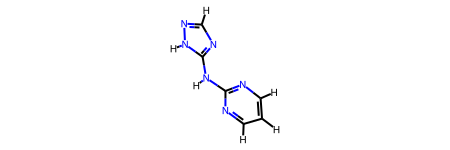

In [3]:
display(rdmol)

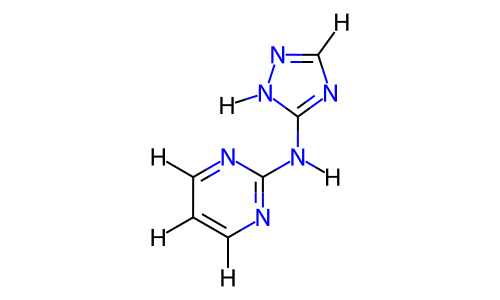

[Atom(name=, atomic number=1), Atom(name=, atomic number=6), Atom(name=, atomic number=7), Atom(name=, atomic number=6), Atom(name=, atomic number=7), Atom(name=, atomic number=1), Atom(name=, atomic number=6), Atom(name=, atomic number=7), Atom(name=, atomic number=6), Atom(name=, atomic number=1), Atom(name=, atomic number=6), Atom(name=, atomic number=1), Atom(name=, atomic number=6), Atom(name=, atomic number=1), Atom(name=, atomic number=7), Atom(name=, atomic number=7), Atom(name=, atomic number=1), Atom(name=, atomic number=7)]


In [35]:
display(mol)
print(mol.atoms)

In [7]:
graph = Graph(mol)
heterograph = graph.heterograph
print(heterograph.ntypes)
# print(heterograph.nodes["n1"].data["h0"][0])

['g', 'n1', 'n2', 'n3', 'n4', 'n4_improper', 'nonbonded', 'onefour']


/pubhome/qcxia02/miniconda3/envs/espaloma/lib/python3.8/site-packages/dgl/heterograph.py:72: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning('Recommend creating graphs by `dgl.graph(data)`'


In [64]:
os.system(f"{UNICON_EXE} -i {sdffile} -o test.mol2")


  
                              unicon
    Universal molecule file converter and sampling (version: 1.4.0)
  
 Authored by:    K.Sommer                                       
 Many thanks to: Prof. M.Rarey and the whole AMD group          
 For more information visit <http://www.zbh.uni-hamburg.de/unicon>.
 Supported file formats:
   Input:
     MOL(*.mol) MOL2(*.mol2) PDB(*.pdb) SDF(*.sdf) SMILES(*.smi *.smiles) PDBx/mmCIF(*.cif *.mcif) InChI(*.inchi)
   Output:
     MOL2(*.mol2) SDF(*.sdf) SMILES(*.smi *.smiles) INCHI(*.inchi)
  
  Adding valid file to input: /pubhome/qcxia02/dataset/TorsionNet500/TorsionNet500_mm_opt_geometries/fragment_1_1.sdf
  Added 1 input files.
  
Starting workflow

  Entries: 1

  Using Entries 1 to 1

  Converting molecules.

  No coordinate generation, no sampling, just conversion
  
  Generated 1 molecules (conversion).

  Exiting program.



0

In [71]:
os.system(f'{CGENFF_EXE} test.mol2 -i mol2 -f test.str')
os.system(f'{CGENFF_EXE} test.mol2 -i mol2 -a -f test_all.str')

CHARMM General Force Field (CGenFF) program version 2.5.1
released August 2021
Copyright (C) 2020 SilcBio LLC
and University of Maryland, School of Pharmacy. All Rights Reserved.

Now processing molecule test ...
CHARMM General Force Field (CGenFF) program version 2.5.1
released August 2021
Copyright (C) 2020 SilcBio LLC
and University of Maryland, School of Pharmacy. All Rights Reserved.

Now processing molecule test ...


0

In [72]:
mol2file = "test.mol2"
mol2lines = Path(mol2file).read_text().split("\n")
crdlines, atomsum = utils.mol2tocrdlines(mol2lines)
# print(crdlines)
outname = "test.crd"
utils.writecrdlines(outname, crdlines, atomsum)

In [74]:
# cwd = os.getcwd()
cwd = "/pubhome/qcxia02/work/espalomac/examples/scripts/utils"
os.system(f'{CHARMM} -i {cwd}/energy.inp workdir={cwd} resi=test str=test.str crd=test.crd cgenff:true modcutoff:true -o energy.out')


 Parameter: WORKDIR <- "/PUBHOME/QCXIA02/WORK/ESPALOMAC/EXAMPLES/SCRIPTS/UTILS"
 Parameter: RESI <- "TEST"
 Parameter: STR <- "TEST.STR"
 Parameter: CRD <- "TEST.CRD"
 Parameter: CGENFF <- "TRUE"
 Parameter: MODCUTOFF <- "TRUE"


0

In [76]:
totE, totE_nodihe = utils.Cout2E(Path("energy.out"))
print(totE, totE_nodihe)
Edihe = totE - totE_nodihe


-208.51868 -209.22281999999998


In [ ]:
heterograph.nodes["n1"].data["xyz"] = torch.tensor([totElist])
heterograph.nodes["g"].data["u_charmm_totE"] = torch.tensor([totElist])
heterograph.nodes["g"].data["u_charmm_totE_nodihe"] = torch.tensor([totE_nodihe_list])
heterograph.nodes["g"].data["u_charmm_Edihe"] = torch.tensor([Edihe_list])
dgl.save_graphs(str(hetgraphfile), [heterograph])


In [ ]:
os.system("sed -i '2c sss' file")